In [1]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from keras.callbacks import EarlyStopping
from tqdm import tqdm
import pylab

# functions from other notebooks
import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.models import classifier
# from ipynb.fs.full.generate_data import convert, visualize

Using TensorFlow backend.


In [2]:
# Check model performance accuracy before
model = load_model('classify4.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


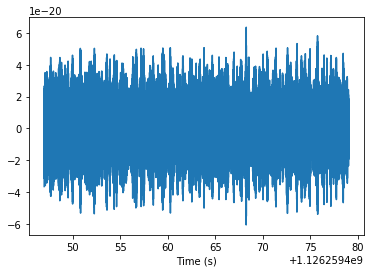

28.0


In [3]:
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass, lowpass_fir

merger = Merger("GW150914")

# Get the data from the Hanford detector
strain = merger.strain('H1')

# Remove the low frequency content and downsample the data to 2048Hz
#strain = lowpass_fir(strain, 2040.0, 8)
strain = resample_to_delta_t( highpass(strain, 20.0), 1.0/4096)

# Remove 2 seconds of data from both the beginning and end
conditioned = strain.crop(2, 2)

pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()

print(conditioned.duration)

In [4]:
# crop the whole thing into 1 second parts to feed in

data = []

for i in np.arange(27):
    d = conditioned.crop(i+0.5, 26.5-i)
    data.append(np.asarray(d))
    
X = np.asarray(data)

In [5]:
t = X*(2.25*10**20)

In [6]:
# Reshape data
test = []
for i in np.arange(len(t)):
    h = t[i].reshape(4096,1)
    test.append(h)
test = np.asarray(test)

In [7]:
result = model.predict(test)

In [8]:
print(result)

[[9.99982715e-01 1.73441113e-05]
 [9.99999404e-01 6.00377575e-07]
 [9.99999166e-01 7.96310474e-07]
 [9.99998450e-01 1.50522783e-06]
 [9.99999404e-01 5.47631998e-07]
 [9.99998093e-01 1.84886039e-06]
 [9.99964952e-01 3.50026858e-05]
 [9.99999762e-01 2.82911174e-07]
 [9.99998689e-01 1.28141903e-06]
 [9.99998212e-01 1.76110211e-06]
 [9.99997616e-01 2.43378463e-06]
 [9.99877214e-01 1.22816797e-04]
 [9.99996901e-01 3.04094374e-06]
 [9.99998927e-01 1.03515515e-06]
 [9.99999523e-01 4.99297073e-07]
 [9.99999762e-01 1.92373804e-07]
 [9.99990463e-01 9.59419958e-06]
 [9.99999046e-01 9.16048691e-07]
 [9.99999642e-01 4.10901407e-07]
 [9.99998093e-01 1.91740946e-06]
 [9.99999881e-01 7.58805072e-08]
 [9.99786913e-01 2.13095496e-04]
 [9.99971509e-01 2.84808411e-05]
 [9.99999523e-01 4.51942356e-07]
 [9.99999881e-01 1.66155445e-07]
 [9.99997139e-01 2.90126036e-06]
 [9.99999881e-01 1.10128916e-07]]


In [94]:
print(test)

[[[-2.15078629]
  [ 6.84214589]
  [-0.05495525]
  ...
  [-0.21920411]
  [ 4.96371717]
  [ 4.65114162]]

 [[-5.64992074]
  [-5.91175953]
  [ 8.52756563]
  ...
  [-3.76176265]
  [ 1.16598324]
  [ 3.92867519]]

 [[ 0.64988454]
  [-1.14608187]
  [-0.9514549 ]
  ...
  [-0.03171502]
  [-1.22347075]
  [ 0.4618974 ]]

 ...

 [[ 5.12191557]
  [-0.3672427 ]
  [-3.58393254]
  ...
  [-0.42339588]
  [ 5.44507204]
  [-1.6400201 ]]

 [[-5.85733931]
  [ 4.06579726]
  [ 2.49839281]
  ...
  [ 0.77228   ]
  [ 2.7437783 ]
  [-2.89384069]]

 [[-3.5723896 ]
  [ 1.13399463]
  [ 1.23174555]
  ...
  [ 2.49989735]
  [ 1.49493781]
  [-1.02461918]]]


# The following in fact worked!

In [95]:

'''
from pycbc.waveform import get_td_waveform
from numpy.random import uniform, randint

hp,hc=get_td_waveform(approximant="SEOBNRv4_opt",
                          mass1=36,    
                          mass2=36,
                          delta_t=1.0/4096,
                          f_lower=20,
                          distance=400)
# randomly shift
    # To fit the whole waveform in the 1 second window, need to specify a cyclic shift range. 
    # 0.08 act as buffer since signal still oscillates a little after merging.
sigtime = abs(hp.start_time) + 0.08
    
if sigtime < 1:
    # resize to window of 1 second
    hp.resize(4096)
    shift_range = 1 - sigtime
    shifted = hp.cyclic_time_shift(uniform(0.0,shift_range))
else:
    totaltime = hp.duration
    hp.start_time = 0
    hp = hp.crop(0, totaltime - sigtime)
    shifted = hp.crop(hp.duration-1,0)
    
    # reset start time
shifted.start_time = 0
'''

In [96]:
'''
combined = np.asarray(shifted) + X[0]

c=combined*(10**22)

cc = c.reshape(4096,1)
c = np.asarray(cc)
test = [c]

test = np.asarray(test)
'''

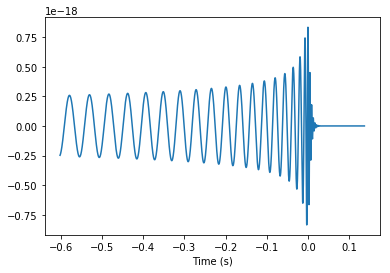

In [99]:
from pycbc.waveform import get_td_waveform
from numpy.random import uniform, randint

hp,hc=get_td_waveform(approximant="SEOBNRv4_opt",
                          mass1=36,    
                          mass2=36,
                          delta_t=1.0/4096,
                          f_lower=20,
                          distance=1)

pylab.plot(hp.sample_times, hp)
pylab.xlabel('Time (s)')
pylab.show()

In [100]:
import pycbc.catalog

c = pycbc.catalog.Catalog()

# Names of mergers in the catalog
print(c.names)

dict_keys(['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', 'GW170809', 'GW170814', 'GW170817', 'GW170818', 'GW170823'])
